### Data Loading

In [2]:
# Data manipulation

import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [3]:
game_data = pd.read_csv('vgsales.csv')

# Display the first few rows of the dataset
game_data.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [4]:
# Display the shape of the dataset
game_data.shape

(16598, 11)

In [5]:
# Display the information about the dataset
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Describing the dataset
game_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Cleaning the Dataset

In [7]:
# Copying the dataset for cleaning
cleaned_game_data = game_data.copy()

In [8]:
# Display the first few rows of the dataset
game_data.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [9]:
# Checking for null values
cleaned_game_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

_It was detected that we have 271 missing data in the Year column and 58 mising data in the Publisher column. However, I decided to leave the missing values untouched._

In [10]:
# Checking the columns in the dataset
print("Columns in the dataset are:", game_data.columns)

Columns in the dataset are: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


_The Rank column happens to be an unnecessary in the dataset, so I would drop it._

In [11]:
# Drop unnecessary columns
game_data.drop(columns=['Rank'], inplace=True)

In [12]:
# Checking the dataset
game_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
#Coverting the 'Year' column to datetime format
game_data['Year'] = pd.to_datetime(game_data['Year'], format='%Y', errors='coerce')
# Checking the data types of the columns
print("Data types of the columns are:\n", game_data.dtypes) 

Data types of the columns are:
 Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object


_Since there is nothing to clean from the dataset, I proceeded to exploring the dataset._

#### Exploring the dataset.

1. Single Variable
2. Relationship Analysis
3. Regional Analysis
4. Publisher Analysis
5. Correlations Analysis

### Exploring Data Analysis

#### Single Variable Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_384\3819658122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Global_Sales', data=top_10_games, palette='viridis');


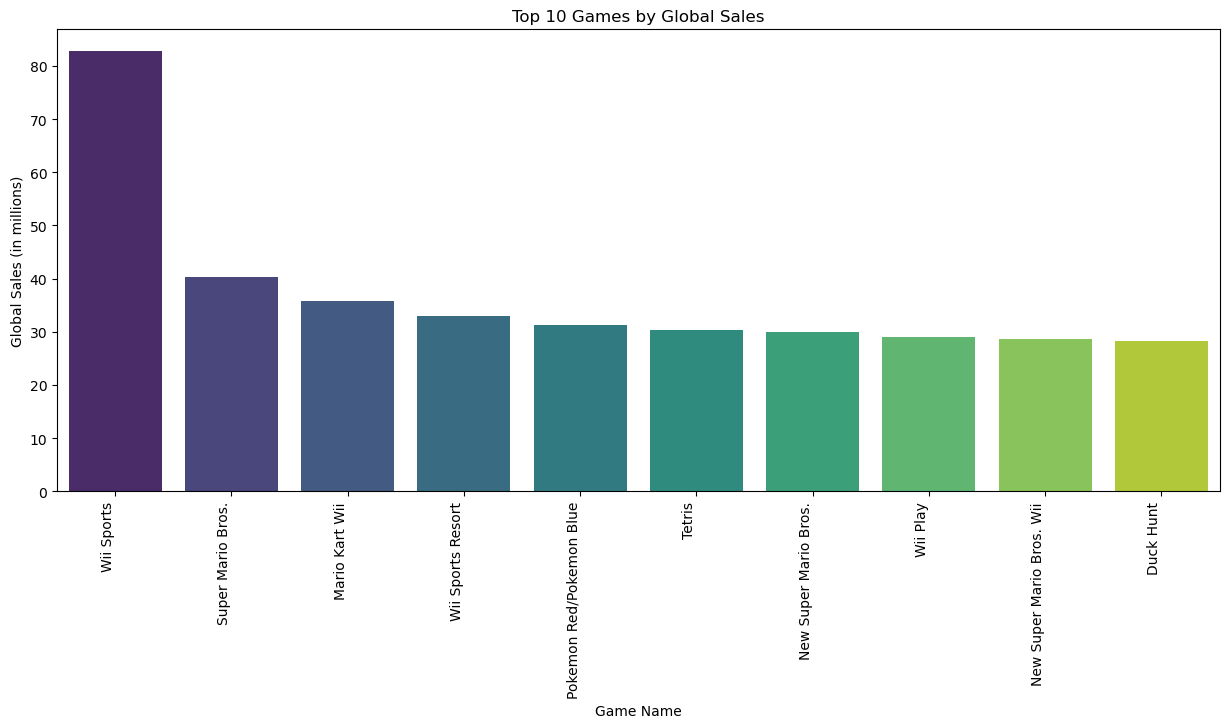

In [14]:
# plotting  for top 10 games

top_10_games = game_data.nlargest(10, 'Global_Sales')[['Name', 'Global_Sales']]
top_10_games = top_10_games.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Name', y='Global_Sales', data=top_10_games, palette='viridis');

plt.xticks(rotation=90, ha='right')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Games by Global Sales');


C:\Users\User\AppData\Local\Temp\ipykernel_384\1070377630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Platform', y='Global_Sales', data= top_10_platforms, palette='viridis')


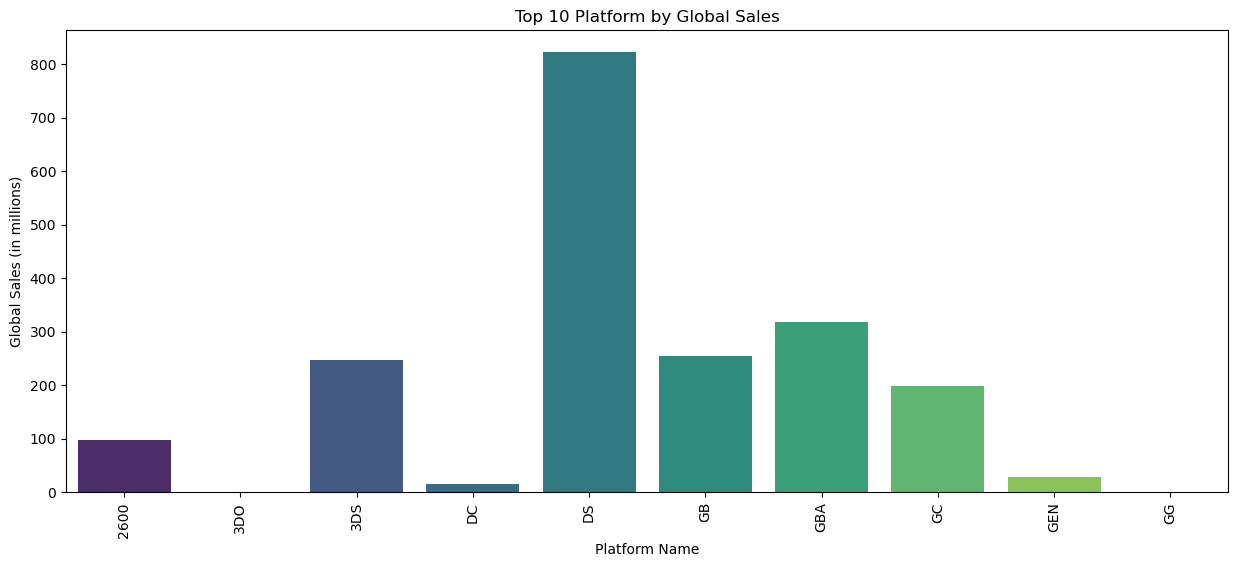

In [15]:
# Top 10 Plaforms

top_10_platforms = game_data.groupby('Platform')['Global_Sales'].sum().reset_index().head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Platform', y='Global_Sales', data= top_10_platforms, palette='viridis')


plt.xticks(rotation=90)
plt.xlabel('Platform Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Platform by Global Sales');

C:\Users\User\AppData\Local\Temp\ipykernel_384\3869251138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Genre', y='Game_Count', data= top_100_genres, palette='bright')


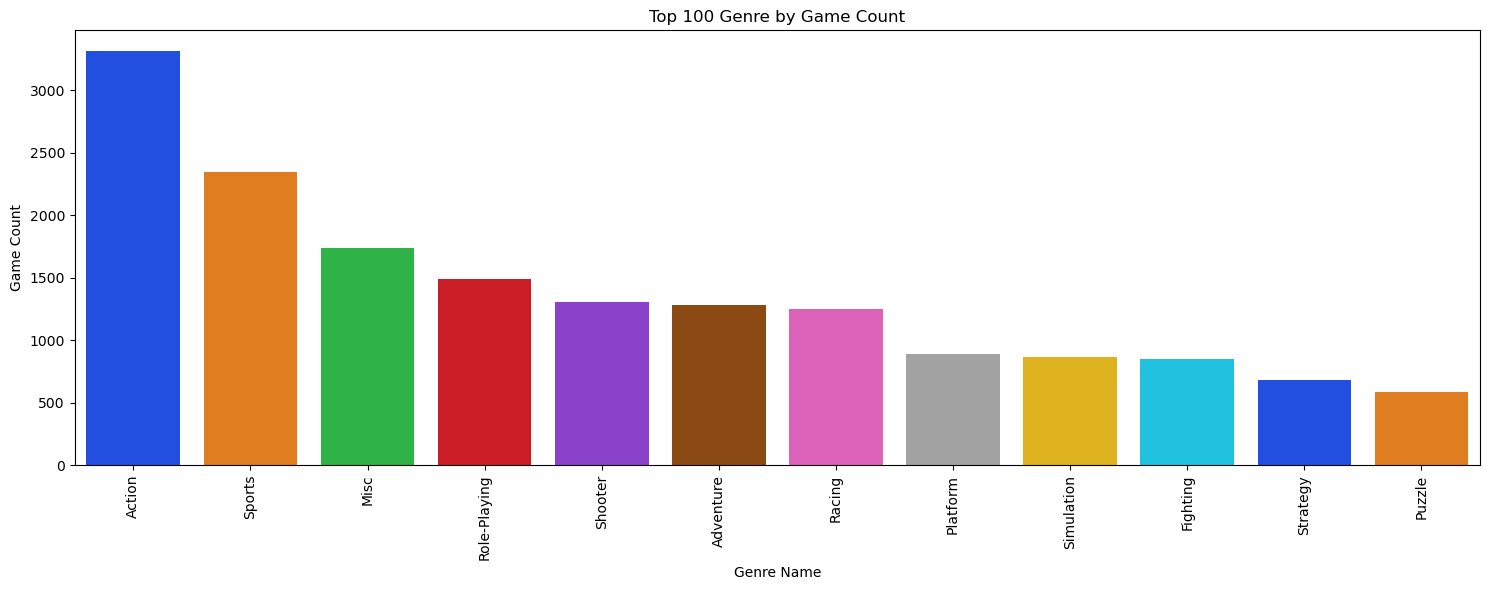

In [16]:
# Top 10 Genres

top_100_genres = game_data.groupby('Genre')['Name'].count().reset_index()
top_100_genres.columns = ['Genre', 'Game_Count']
top_100_genres = top_100_genres.sort_values(by='Game_Count', ascending=False).head(100)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Genre', y='Game_Count', data= top_100_genres, palette='bright')


plt.xticks(rotation=90)
plt.xlabel('Genre Name')
plt.ylabel('Game Count')
plt.title('Top 100 Genre by Game Count')
plt.tight_layout()

In [17]:
game_data.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997-01-01,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,Super Mario Bros. 2,NES,1988-01-01,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,Super Smash Bros. for Wii U and 3DS,3DS,2014-01-01,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,Call of Duty: World at War,X360,2008-01-01,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


#### Relationship Analysis

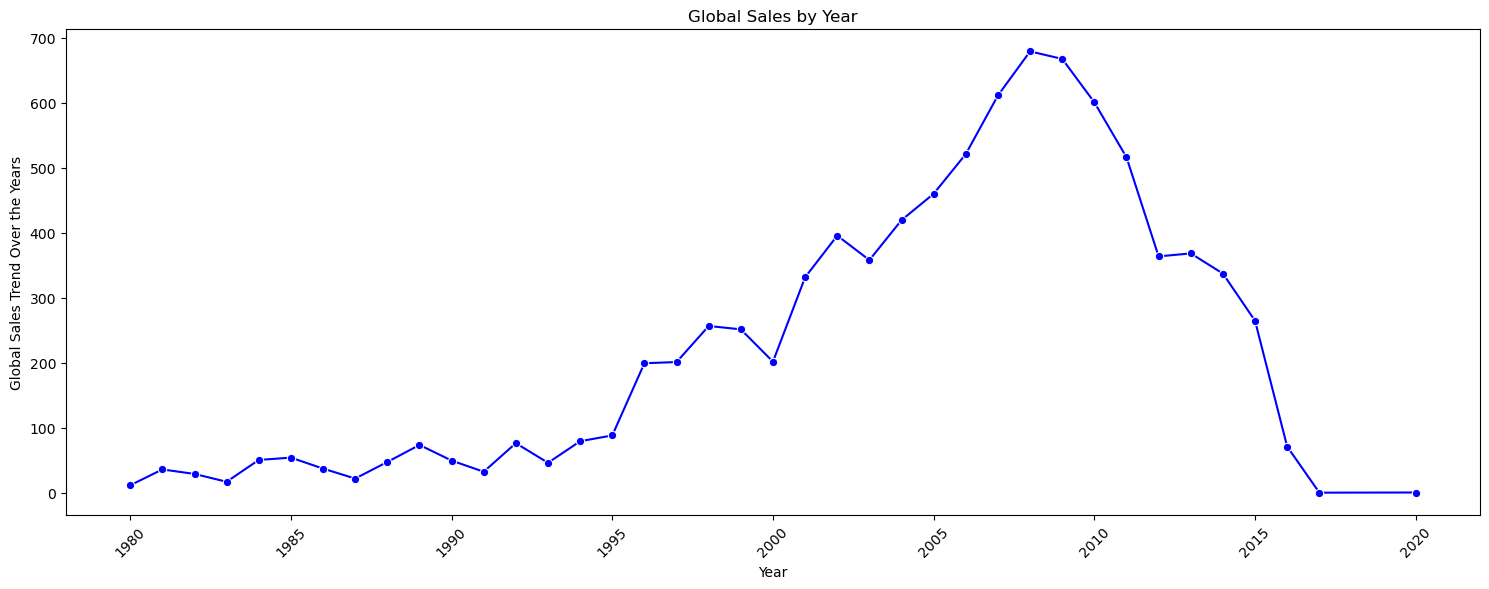

In [18]:
# Sales by Year
sales_by_year = game_data.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Global_Sales', data=sales_by_year, marker='o', color='blue')

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Global Sales Trend Over the Years')
plt.title('Global Sales by Year')
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_384\2069396164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Genre', y = 'Global_Sales', data = game_data, estimator = sum, order= game_data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index,


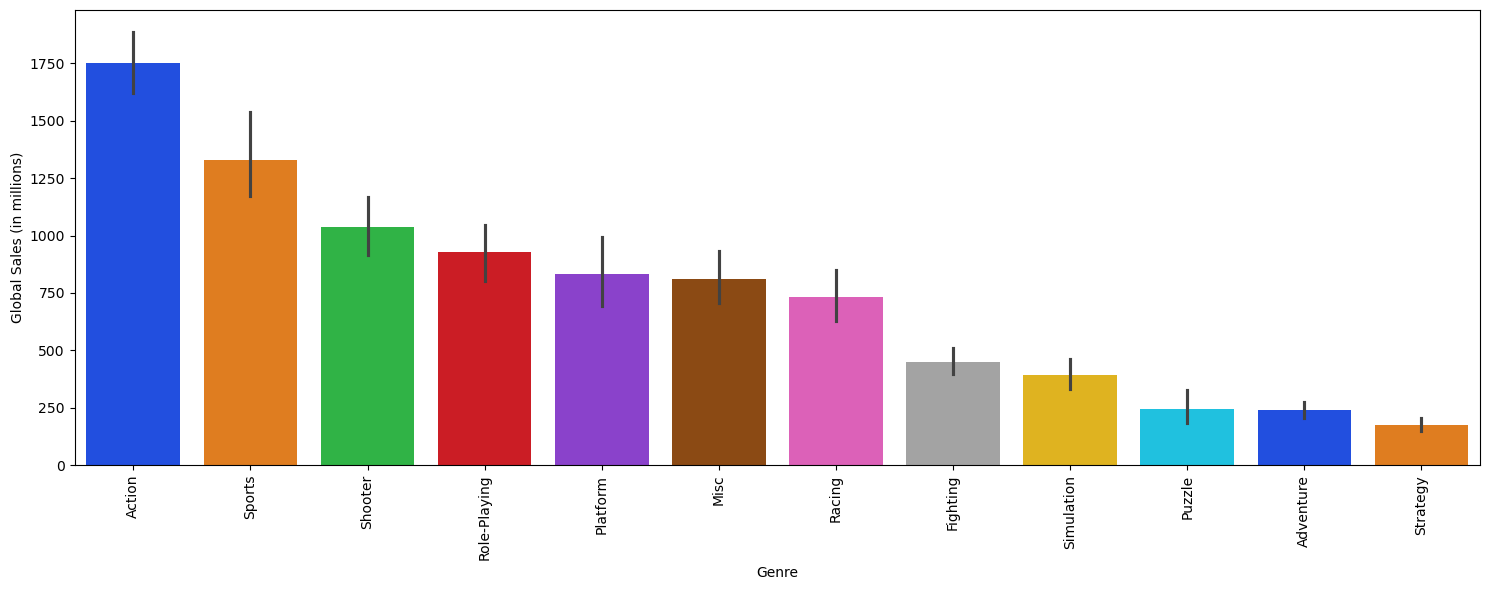

In [20]:
# Sales by Genre
plt.figure(figsize=(15, 6))
sns.barplot(x = 'Genre', y = 'Global_Sales', data = game_data, estimator = sum, order= game_data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index, 
palette='bright')

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_14192\2281716755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Platform", y = "NA_Sales", data = top_platforms_sales_NA, palette='bright')


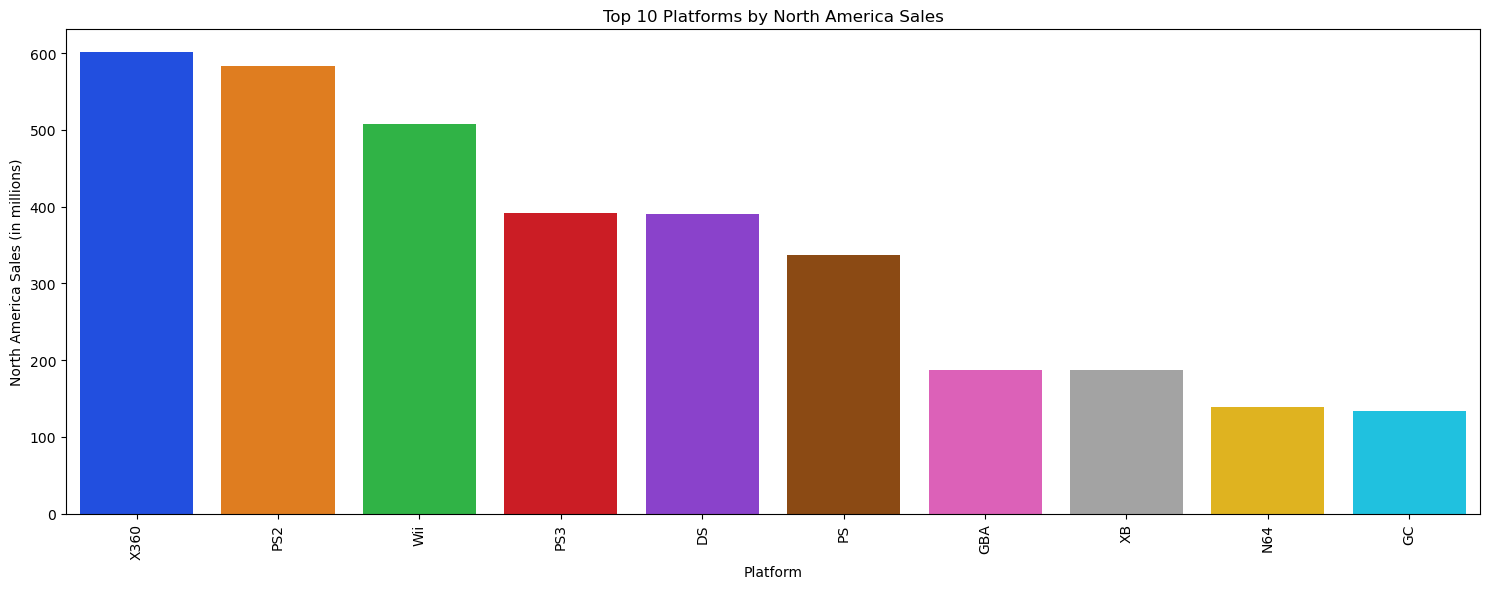

In [ ]:
# Sales by Platform in North America
top_platforms_sales_NA = game_data.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = "Platform", y = "NA_Sales", data = top_platforms_sales_NA, palette='bright')

plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('North America Sales (in millions)')
plt.title('Top 10 Platforms by North America Sales')
plt.tight_layout()

#### Regional Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14192\4148596710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_sales_comparison.index, y=regional_sales_comparison.values, palette= ['blue', 'green', 'orange'])  # Plotting North America Sales
C:\Users\User\AppData\Local\Temp\ipykernel_14192\4148596710.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


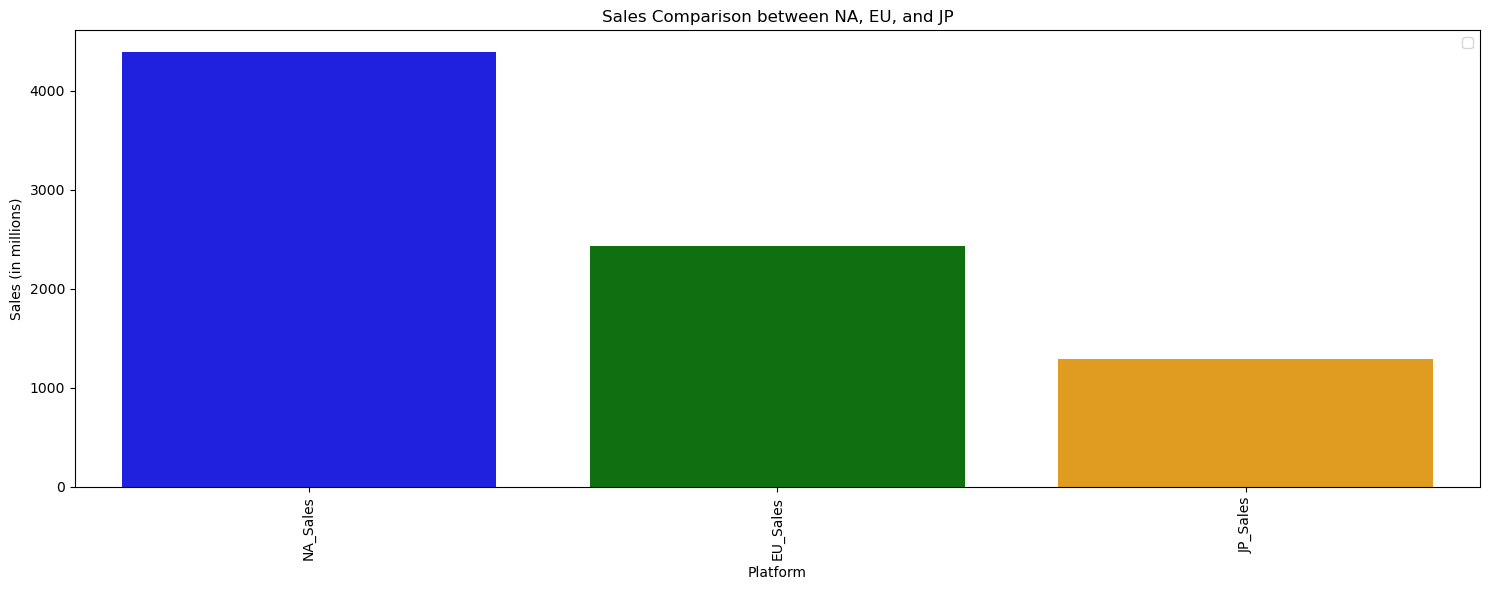

In [ ]:
# Sales Comparison between NA, EU, and JP

regional_sales_comparison = game_data[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

plt.figure(figsize=(15, 6))
sns.barplot(x=regional_sales_comparison.index, y=regional_sales_comparison.values, palette= ['blue', 'green', 'orange'])  # Plotting North America Sales

plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison between NA, EU, and JP')
plt.tight_layout()

#### Publisher Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14192\1644305975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Publisher", y = "Global_Sales", data = top_10_publishers, palette = "bright")


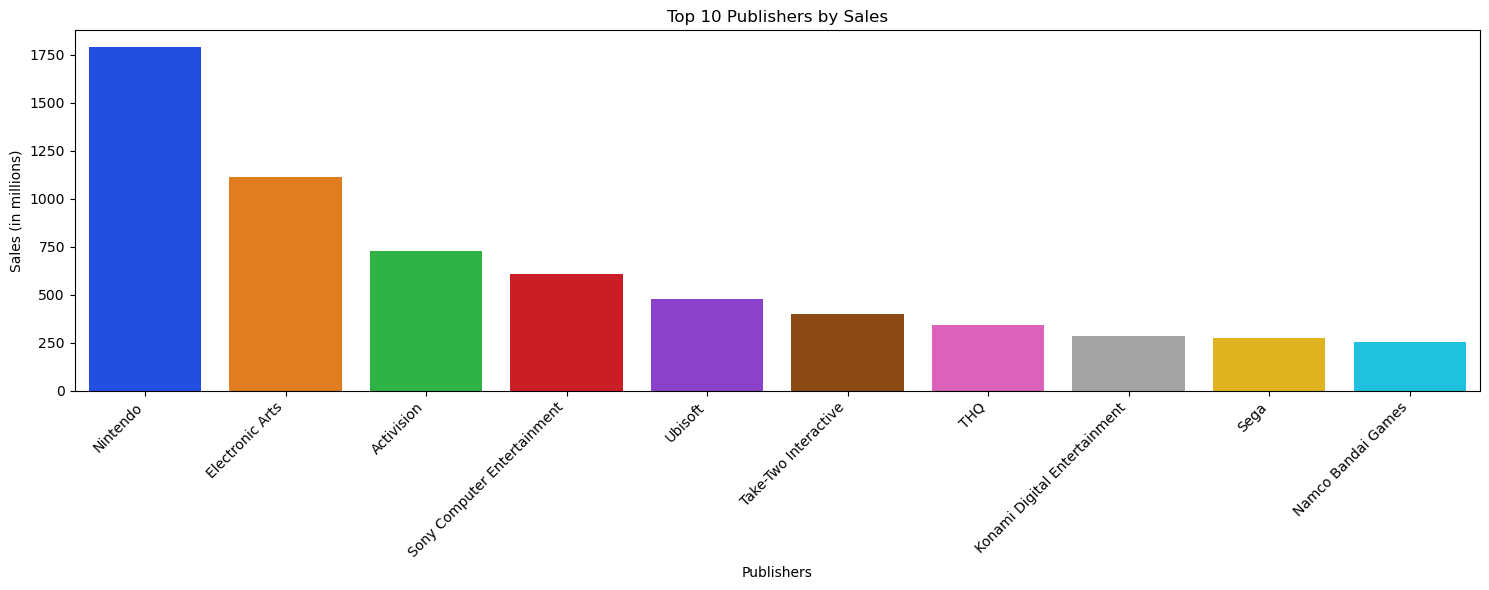

In [ ]:
# Top 10 Publishers

top_10_publishers = game_data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x = "Publisher", y = "Global_Sales", data = top_10_publishers, palette = "bright")

plt.xticks(rotation= 45, ha='right')
plt.xlabel('Publishers')
plt.ylabel('Sales (in millions)')
plt.title('Top 10 Publishers by Sales')
plt.tight_layout()

#### Correlational Analysis

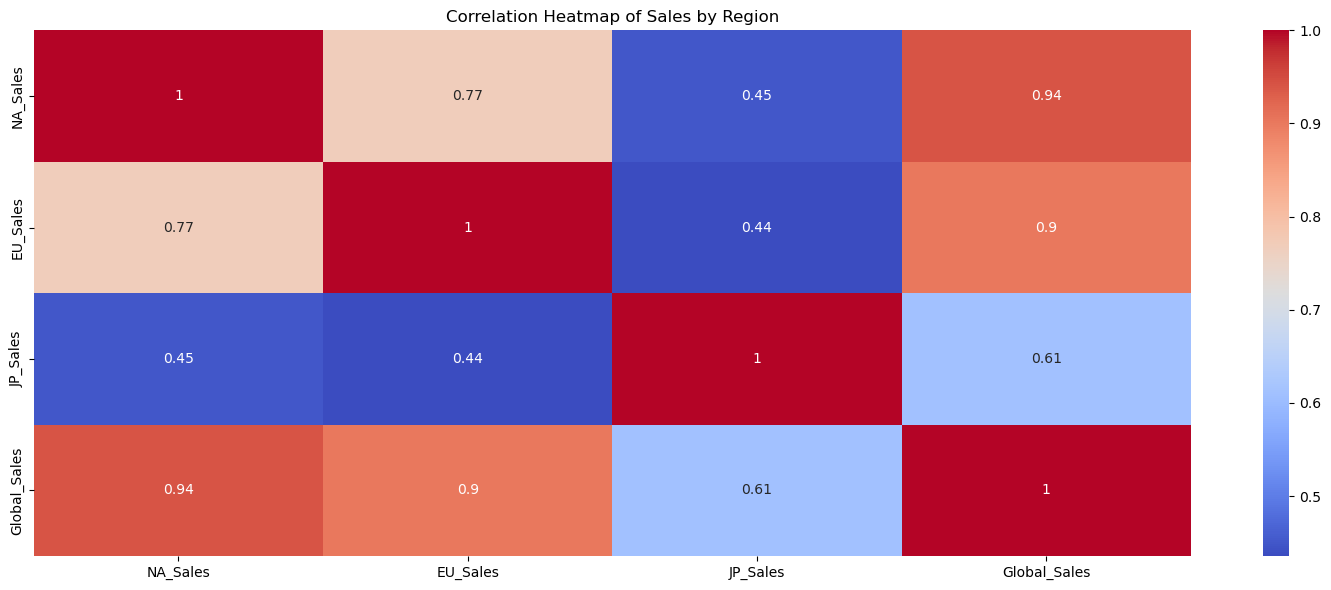

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(game_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sales by Region')
plt.tight_layout()